In [81]:
import re
import os
import json
import time
import math
import logging
import requests
import pandas as pd
import folium
import random
import seaborn as sns
import webbrowser
import seaborn as sns
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
from lxml import etree
from datetime import datetime
from bs4 import BeautifulSoup
from wordcloud import WordCloud
plt.style.use("ggplot")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.sans-serif']=['SimHei'] 

## 数据抓取

In [20]:
def crawl_data(kw, cityId, base_url):
    df = pd.DataFrame()
    init_len = 500 # 默认最大爬取 500 页
    for i in range(init_len):
        if i == 0: # 首页面的无需传start参数
            start = ''
        else:
            start = 'start={0}&'.format(i*90) # 首页之后需要传start参数
        crawl_url = base_url.format(start, cityId, kw)
        response = requests.get(crawl_url).json()['data']['results']
        if response == []: # 无响应的时候直接跳出（没有页面了）
            print('response limit: ' + str(i))
            break
            
        data_lis = requests.get(crawl_url).json()['data']['results']
        for j in range(len(data_lis)):
            data_dic = data_lis[j]
            try:
                city = data_dic['city']['display']
            except Exception as e:
                print('city error : {0}.'.format(e))
                continue
            try:
                companyName = data_dic['company']['name']
            except Exception as e:
                print('companyName error : {0}.'.format(e))
                continue
            try:
                companySize = data_dic['company']['size']['name']
            except Exception as e:
                print('companySize error : {0}.'.format(e))
                continue
            try:
                companyType = data_dic['company']['type']['name']
            except Exception as e:
                print('companyType error : {0}.'.format(e))
                continue
            try:
                eduLevel = data_dic['eduLevel']['name']
            except Exception as e:
                print('eduLevel error : {0}.'.format(e))
                continue
            try:
                workingExp = data_dic['workingExp']['name']
            except Exception as e:
                print('workingExp error : {0}.'.format(e))
                continue
            try:
                jobName = data_dic['jobName']
            except Exception as e:
                print('jobName error : {0}.'.format(e))
                continue
            try:
                jobType = data_dic['jobType']['items'][0]["name"] 
            except Exception as e:
                print('jobType error : {0}.'.format(e))
                continue
            try:
                positionLabel = data_dic['positionLabel'] 
            except Exception as e:
                print('positionLabel error : {0}.'.format(e))
                continue
            try:
                salary = data_dic['salary'] 
            except Exception as e:
                print('salary error : {0}.'.format(e))
                continue
            try:
                emplType = data_dic['emplType']
            except Exception as e:
                print('emplType error : {0}.'.format(e))
                continue
            
            dic = {'city': city, # 城市
                   'companyName': companyName, # 公司名称
                   'companySize': companySize, # 公司规模
                   'companyType': companyType, # 公司类型
                   'eduLevel': eduLevel, # 学历要求
                   'workingExp': workingExp, # 工作经验
                   'jobName': jobName, # 职位名称
                   'jobType': jobType, # 职位类型
                   'positionLabel': positionLabel, # 技能标签
                   'salary': salary, # 薪资水平
                   'emplType': emplType # 招聘类型}
            
            df = df.append(pd.DataFrame.from_dict(dic, orient='index').T)
        print('{0}: now processing page number: '.format(cityId) + str(i))
        sleep_time = random.randrange(15)
        time.sleep(sleep_time) # 随机停几秒
    df.to_pickle('data_analysis_position(数据分析_{0})'.format(cityId)) # pickle持久化导出
    return df

In [21]:
base_url = 'https://fe-api.zhaopin.com/c/i/sou?{0}pageSize=90&cityId={1}&salary=0,0&workExperience=-1&education=-1&companyType=-1&employmentType=-1&jobWelfareTag=-1&kw={2}&kt=3&=0&_v=0.45927963&x-zp-page-request-id=223f2a6f36ef437abb859f7801c4d699-1563078835102-964080&x-zp-client-id=27dba95b-b50b-44ec-ee57-27e9b9ba8004'
kw = '数据分析' # 搜索关键字（数据产品 or 数据分析）
cityId_lis = ['530', '538', '765', '763', '531', '801', '653', '736', '600', '613', '635', '702', '703', '639', '599', '854', '719', '749', '551', '622', '636', '654', '681', '682', '565', '664', '773'] # all cityId
for i in range(len(cityId_lis)):
    position_df = crawl_data(kw, cityId_lis[i], base_url)

530: now processing page number: 0
530: now processing page number: 1
530: now processing page number: 2
530: now processing page number: 3
530: now processing page number: 4
530: now processing page number: 5
530: now processing page number: 6
530: now processing page number: 7
530: now processing page number: 8
530: now processing page number: 9
530: now processing page number: 10
530: now processing page number: 11
response limit: 12
538: now processing page number: 0
538: now processing page number: 1
538: now processing page number: 2
538: now processing page number: 3
538: now processing page number: 4
538: now processing page number: 5
538: now processing page number: 6
538: now processing page number: 7
538: now processing page number: 8
538: now processing page number: 9
538: now processing page number: 10
538: now processing page number: 11
response limit: 12
765: now processing page number: 0
765: now processing page number: 1
765: now processing page number: 2
765: now proc

551: now processing page number: 11
response limit: 12
workingExp error : 'workingExp'.
622: now processing page number: 0
622: now processing page number: 1
622: now processing page number: 2
622: now processing page number: 3
622: now processing page number: 4
622: now processing page number: 5
622: now processing page number: 6
622: now processing page number: 7
622: now processing page number: 8
622: now processing page number: 9
response limit: 10
workingExp error : 'workingExp'.
workingExp error : 'workingExp'.
workingExp error : 'workingExp'.
workingExp error : 'workingExp'.
workingExp error : 'workingExp'.
636: now processing page number: 0
workingExp error : 'workingExp'.
636: now processing page number: 1
636: now processing page number: 2
636: now processing page number: 3
636: now processing page number: 4
636: now processing page number: 5
636: now processing page number: 6
636: now processing page number: 7
636: now processing page number: 8
636: now processing page numbe

## 数据处理

In [4]:
# 读取数据产品dataframe
cityId_lis = ['530', '538', '765', '763', '531', '801', '653', '736', '600', '613', '635', '702', '703', '639', '599', '854', '719', '749', '551', '622', '636', '654', '681', '682', '565', '664', '773'] # all cityId
data_product_df = pd.DataFrame()
for i in range(len(cityId_lis)):
    data_product_df = data_product_df.append(pd.read_pickle(u'/Users/patientman/Desktop/产品盐/VOL_002/数据产品/data_product_position(数据产品_{0})'.format(cityId_lis[i])))

In [5]:
data_product_df.head(1)

,eduLevel,city,companyType,companySize,companyName,positionLabel,salary,jobType,workingExp,emplType,jobName
0,学历不限,北京-朝阳区,民营,10000人以上,上海友而信市场信息咨询有限公司北京朝阳分公司,"{""qualifications"":null,""role"":null,""chatWindow...",15K-25K,证券/期货/投资管理/服务,不限,全职,金融产品经理（数据方向） (MJ000028)


In [6]:
# 读取数据分析职位dataframe
data_analysis_df = pd.DataFrame()
for i in range(len(cityId_lis)):
    data_analysis_df = data_analysis_df.append(pd.read_pickle(u'/Users/patientman/Desktop/产品盐/VOL_002/数据分析/data_analysis_position(数据分析_{0})'.format(cityId_lis[i])))

In [7]:
data_analysis_df.head(1)

,eduLevel,city,companyType,companySize,companyName,positionLabel,salary,jobType,workingExp,emplType,jobName
0,学历不限,北京-朝阳区,合资,100-499人,北京联众汇鑫投资管理有限公司,"{""qualifications"":null,""role"":null,""chatWindow...",10K-15K,咨询/顾问/调研/数据分析,不限,全职,金融经济数据分析 纯技术岗 非销售 周末双休


In [8]:
# 基础清洗
def data_process(df):
    # 重置index
    df = df.reset_index()
    del df['index']
    # 城市字段处理为1级城市（不含区）
    df['city_level_1'] = [ct.split('-')[0] for ct in list(df['city'])]
    # 读取技能标签
    df['skillLabel'] = [json.loads(label)['skillLabel'] for label in df['positionLabel']]
    # 读取技能标签中的值
    for i in range(len(df)):
        skill_lis = df.loc[i, 'skillLabel']
        if len(skill_lis) == 0:
            continue
        else:
            skill_str_lis = []
            for skill in skill_lis:
                skill_str_lis.append(skill['value'])
            df.loc[i, 'skillLabel'] = skill_str_lis
    return df

In [9]:
data_product_df = data_process(data_product_df)

In [10]:
data_product_df.head(1)

,eduLevel,city,companyType,companySize,companyName,positionLabel,salary,jobType,workingExp,emplType,jobName,city_level_1,skillLabel
0,学历不限,北京-朝阳区,民营,10000人以上,上海友而信市场信息咨询有限公司北京朝阳分公司,"{""qualifications"":null,""role"":null,""chatWindow...",15K-25K,证券/期货/投资管理/服务,不限,全职,金融产品经理（数据方向） (MJ000028),北京,"[SQL, 数据分析, 产品分析]"


In [11]:
# 发现有一些职位是title里面根本没有数据 或 产品的，标记出来这部分，过滤掉! 
data_product_df['jobMainName'] = [1 if ('产品' or '数据') in name else 0 for name in data_product_df['jobName']]
real_data_product_df = data_product_df[data_product_df['jobMainName'] == 1]

In [12]:
len(real_data_product_df)

5083

In [13]:
data_analysis_df = data_process(data_analysis_df)

In [14]:
data_analysis_df.head(1)

,eduLevel,city,companyType,companySize,companyName,positionLabel,salary,jobType,workingExp,emplType,jobName,city_level_1,skillLabel
0,学历不限,北京-朝阳区,合资,100-499人,北京联众汇鑫投资管理有限公司,"{""qualifications"":null,""role"":null,""chatWindow...",10K-15K,咨询/顾问/调研/数据分析,不限,全职,金融经济数据分析 纯技术岗 非销售 周末双休,北京,[]


In [15]:
# 发现有一些职位是title里面根本没有数据 或 分析的，标记出来这部分，过滤掉!
data_analysis_df['jobMainName'] = [1 if ('分析' or '数据') in name else 0 for name in data_analysis_df['jobName']]
real_data_analysis_df = data_analysis_df[data_analysis_df['jobMainName'] == 1]

In [16]:
len(real_data_analysis_df)

3538

# 招聘方

## 整体范围分析

In [17]:
df = pd.DataFrame(real_data_analysis_df.groupby(['city_level_1']).count()['city'])
df.rename(columns={'city':'数据分析'}, inplace=True)
df2 = pd.DataFrame(real_data_product_df.groupby(['city_level_1']).count()['city'])
df = df.merge(df2, how='inner', on='city_level_1')
df.rename(columns={'city':'数据产品'}, inplace=True)
df['城市'] = df.index
df = df.reset_index()
del df['city_level_1']
# 转化为Seaborn柱状图支持hue画法的格式
city_lis = list()
val_lis = list()
pos_lis = list()
tp = ['数据分析', '数据产品']
for i in range(len(df)):
    city = df.loc[i, '城市']
    da = df.loc[i, tp[0]]
    dp = df.loc[i, tp[1]]
    city_lis += [city] * 2
    val_lis += [da, dp]
    pos_lis += tp

In [18]:
bar_dic = {"职位类型": pos_lis, "职位数量": val_lis, "城市": city_lis}
bar_df = pd.DataFrame(bar_dic, columns=['职位类型', '职位数量', '城市'])
bar_df = bar_df.sort_values('职位数量', ascending=False)

/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


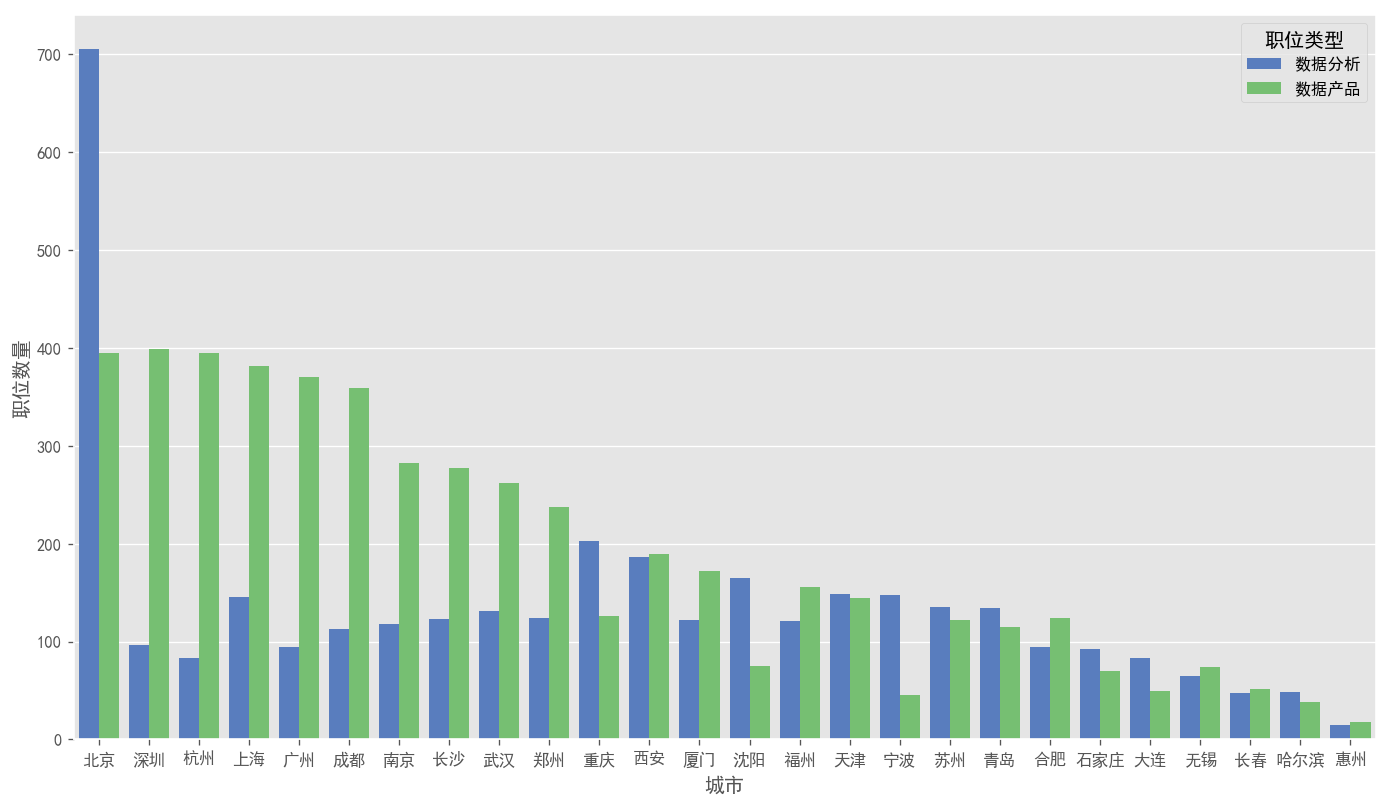

In [19]:
plt.figure(figsize=(14,8), dpi=120)
sns.barplot(x="城市", y="职位数量", hue='职位类型', data=bar_df, palette = 'muted')
plt.savefig("1-整体范围分布.jpg")
plt.show()

## 公司类型分析

/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


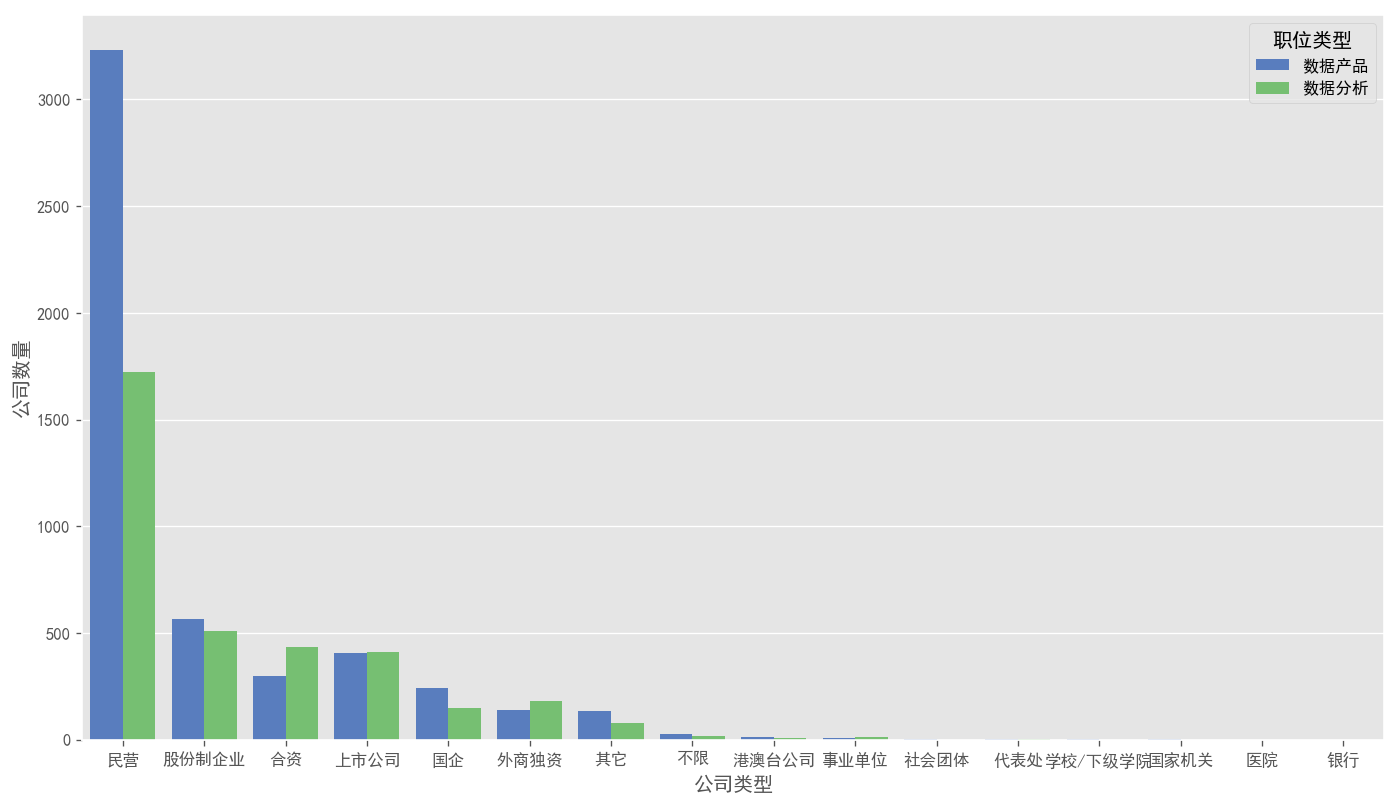

In [75]:
# 公司类型数据准备
df = pd.DataFrame(real_data_product_df.groupby('companyType').size())
df.rename(columns={0:'数据产品'}, inplace=True)
df2 = pd.DataFrame(real_data_analysis_df.groupby('companyType').size())
df2.rename(columns={0:'数据分析'}, inplace=True)
df = df.merge(df2, on='companyType', how='outer')
df = df.fillna(0)
# 公司类型数据转化为可绘制hue图的类型
cptype_lis = list()
val_lis = list()
pos_lis = list()
tp = ['数据分析', '数据产品']
for i in range(len(df)):
    cptype = df.index[i]
    da = df.loc[cptype, tp[0]]
    dp = df.loc[cptype, tp[1]]
    cptype_lis += [cptype] * 2
    val_lis += [da, dp]
    pos_lis += tp
# 公司类型分布图
cp_bar_dic = {"职位类型": pos_lis, "公司数量": val_lis, "公司类型": cptype_lis}
cp_bar_df = pd.DataFrame(cp_bar_dic, columns=['职位类型', '公司数量', '公司类型'])
cp_bar_df = cp_bar_df.sort_values('公司数量', ascending=False)
plt.figure(figsize=(14,8), dpi=120)
sns.barplot(x="公司类型", y="公司数量", hue='职位类型', data=cp_bar_df, palette = 'muted')
plt.savefig("2-公司类型分布.jpg")
plt.show()

## 公司规模分析

/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


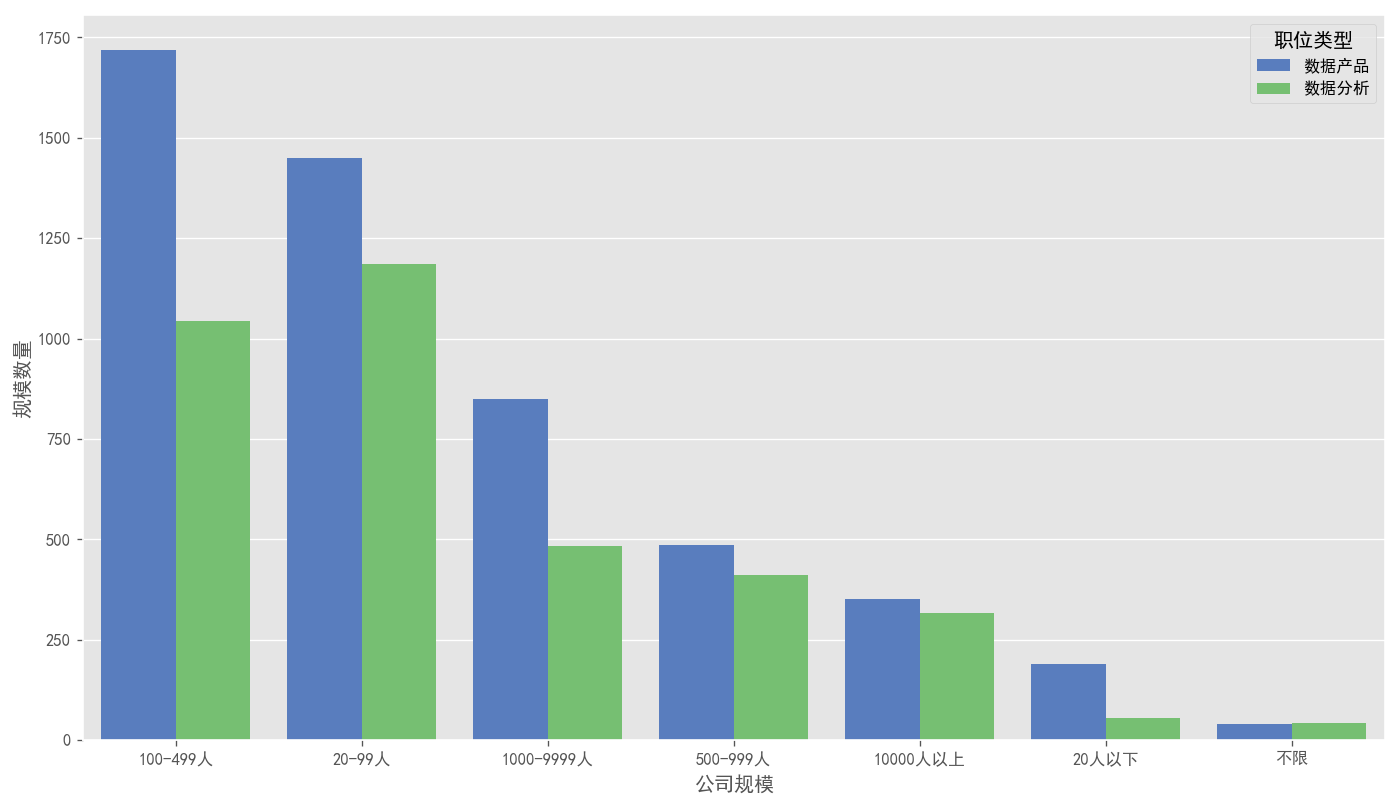

In [120]:
# 公司规模数据准备
df = pd.DataFrame(real_data_product_df.groupby('companySize').size())
df.rename(columns={0:'数据产品'}, inplace=True)
df2 = pd.DataFrame(real_data_analysis_df.groupby('companySize').size())
df2.rename(columns={0:'数据分析'}, inplace=True)
df = df.merge(df2, on='companySize', how='outer')
df = df.fillna(0)
# 公司规模数据转化为可绘制hue图的类型
cpsize_lis = list()
val_lis = list()
pos_lis = list()
tp = ['数据分析', '数据产品']
for i in range(len(df)):
    cpsize = df.index[i]
    da = df.loc[cpsize, tp[0]]
    dp = df.loc[cpsize, tp[1]]
    cpsize_lis += [cpsize] * 2
    val_lis += [da, dp]
    pos_lis += tp
# 公司规模分布图
cp_bar_dic = {"职位类型": pos_lis, "规模数量": val_lis, "公司规模": cpsize_lis}
cp_bar_df = pd.DataFrame(cp_bar_dic, columns=['职位类型', '规模数量', '公司规模'])
cp_bar_df = cp_bar_df.sort_values('规模数量', ascending=False)
plt.figure(figsize=(14,8), dpi=120)
sns.barplot(x="公司规模", y="规模数量", hue='职位类型', data=cp_bar_df, palette = 'muted')
plt.savefig("2-1-公司规模分布.jpg")
plt.show()

## 职位标题重叠度分析

Populating the interactive namespace from numpy and matplotlib


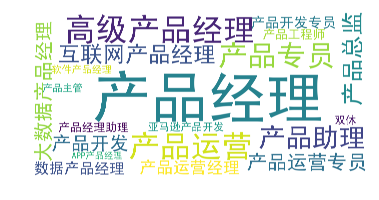

In [106]:
data_product_str = ''
dplis = [name for name in list(real_data_product_df['jobName'])]
for i in range(len(dplis)):
    data_product_str += ' ' + dplis[i]
wordcloud = WordCloud(font_path="simhei.ttf",
                      max_words=20,
                      margin=1,
                      scale=32,
                      background_color="white",
                      mode="RGBA").generate(data_product_str)
%pylab inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file('3-数据产品经理职位标题词云.png')

Populating the interactive namespace from numpy and matplotlib


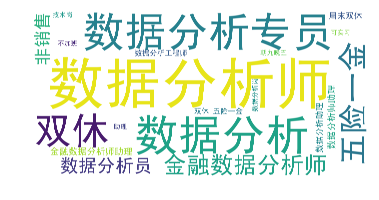

In [119]:
data_ana_str=''
da_lis = [name for name in list(real_data_analysis_df['jobName'])]
for i in range(len(da_lis)):
    data_ana_str += ' ' + da_lis[i]
wordcloud = WordCloud(font_path="simhei.ttf",
                      max_words=20,
                      margin=1,
                      scale=32,
                      background_color="white",
                      mode="RGBA").generate(data_ana_str)
%pylab inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
wordcloud.to_file('3-数据分析师职位标题词云.png')

## 职位类型

In [140]:
# 数据产品职位类型
dp_type_dic = dict()
real_data_product_df = real_data_product_df.reset_index()
for i in range(len(real_data_product_df)):
    type_lis = real_data_product_df.loc[i, 'jobType'].split('/')
    for j in range(len(type_lis)):
        if type_lis[j] in dp_type_dic:
            dp_type_dic[type_lis[j]] += 1
        else:
            dp_type_dic[type_lis[j]] = 1
dp_type_df = pd.DataFrame.from_dict(dp_type_dic, orient='index')
dp_type_df = dp_type_df.sort_values(0, ascending=False)
dp_type_df.rename(columns={0:'职位类型数量'}, inplace=True)
dp_type_df['职位类型名称'] = list(dp_type_df.index)
# 数据分析职位类型
da_type_dic = dict()
real_data_analysis_df = real_data_analysis_df.reset_index()
for i in range(len(real_data_analysis_df)):
    type_lis = real_data_analysis_df.loc[i, 'jobType'].split('/')
    for j in range(len(type_lis)):
        if type_lis[j] in da_type_dic:
            da_type_dic[type_lis[j]] += 1
        else:
            da_type_dic[type_lis[j]] = 1
da_type_df = pd.DataFrame.from_dict(da_type_dic, orient='index')
da_type_df = da_type_df.sort_values(0, ascending=False)
da_type_df.rename(columns={0:'职位类型数量'}, inplace=True)
da_type_df['职位类型名称'] = list(da_type_df.index)

/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


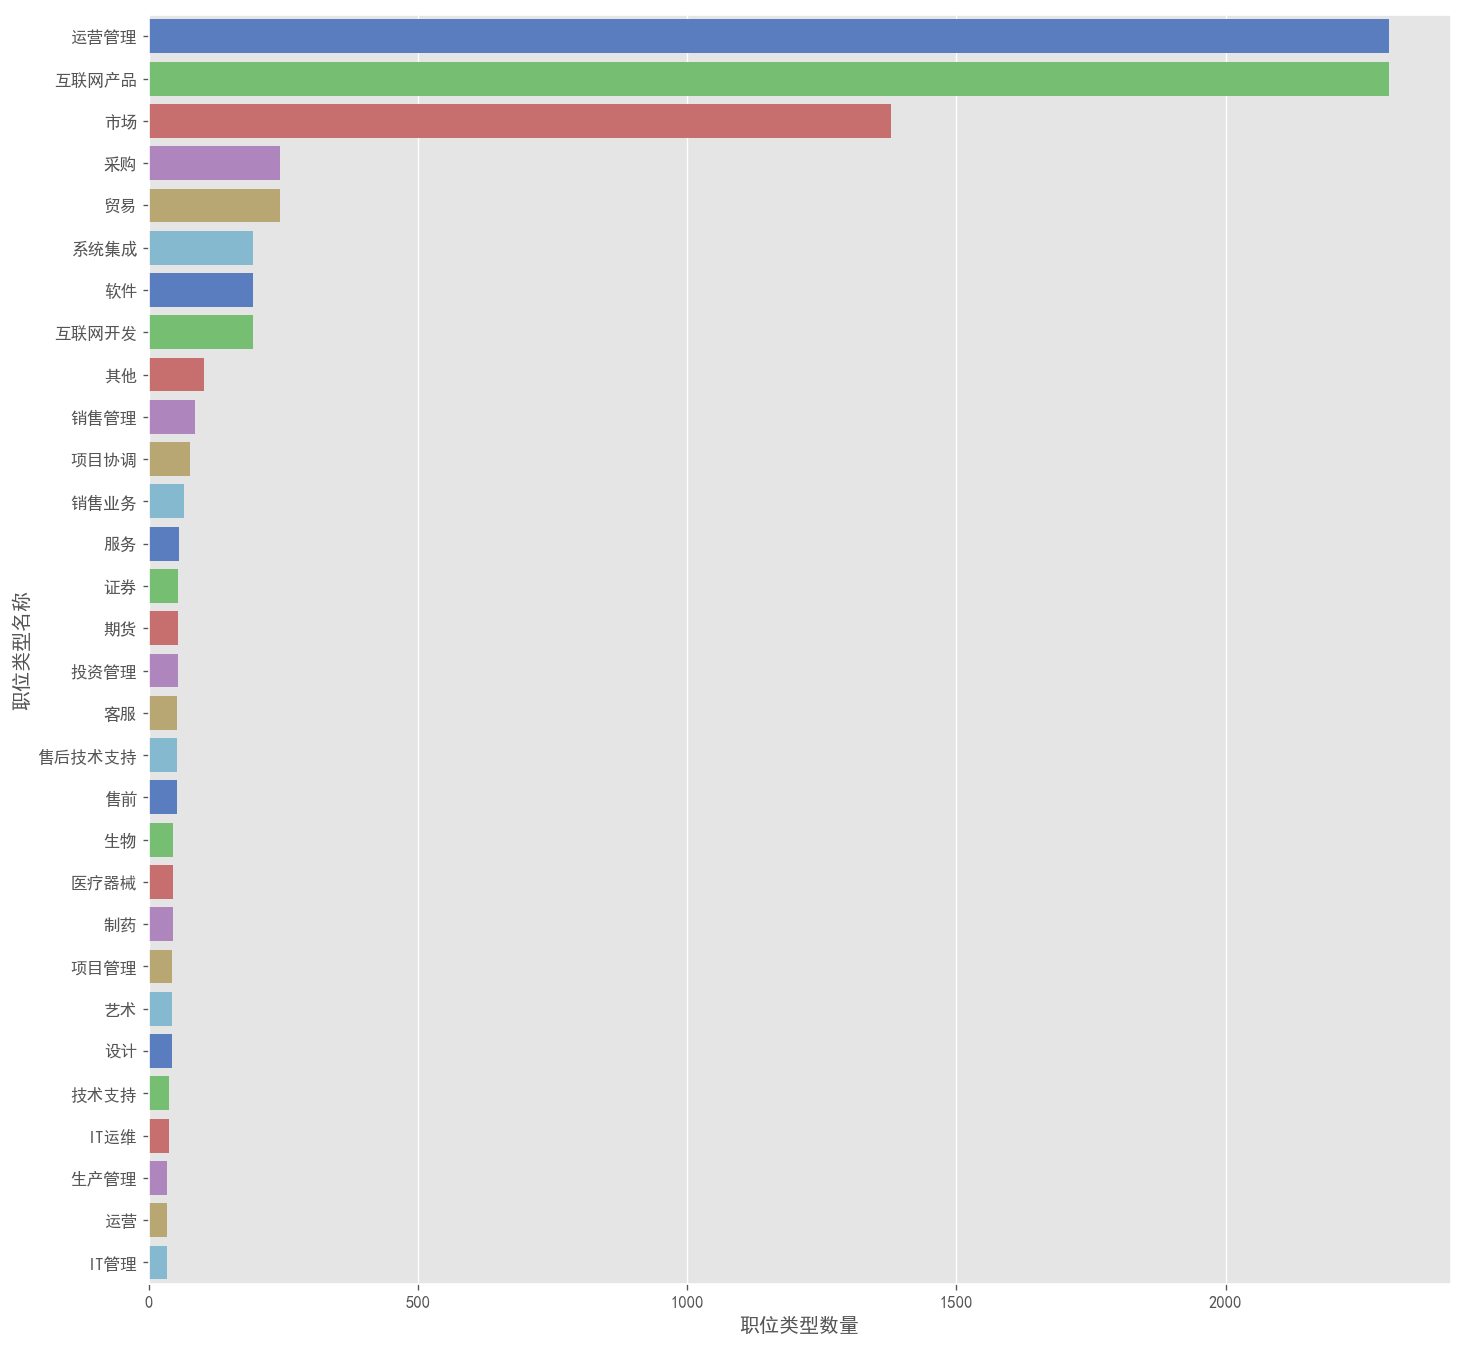

In [177]:
plt.figure(figsize=(14,14), dpi=120)
sns.barplot(y='职位类型名称', x='职位类型数量', data=dp_type_df[:30], palette = 'muted', orient='h')
plt.savefig("2-2-1数据产品经理职位类型统计(TOP30).jpg")

/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


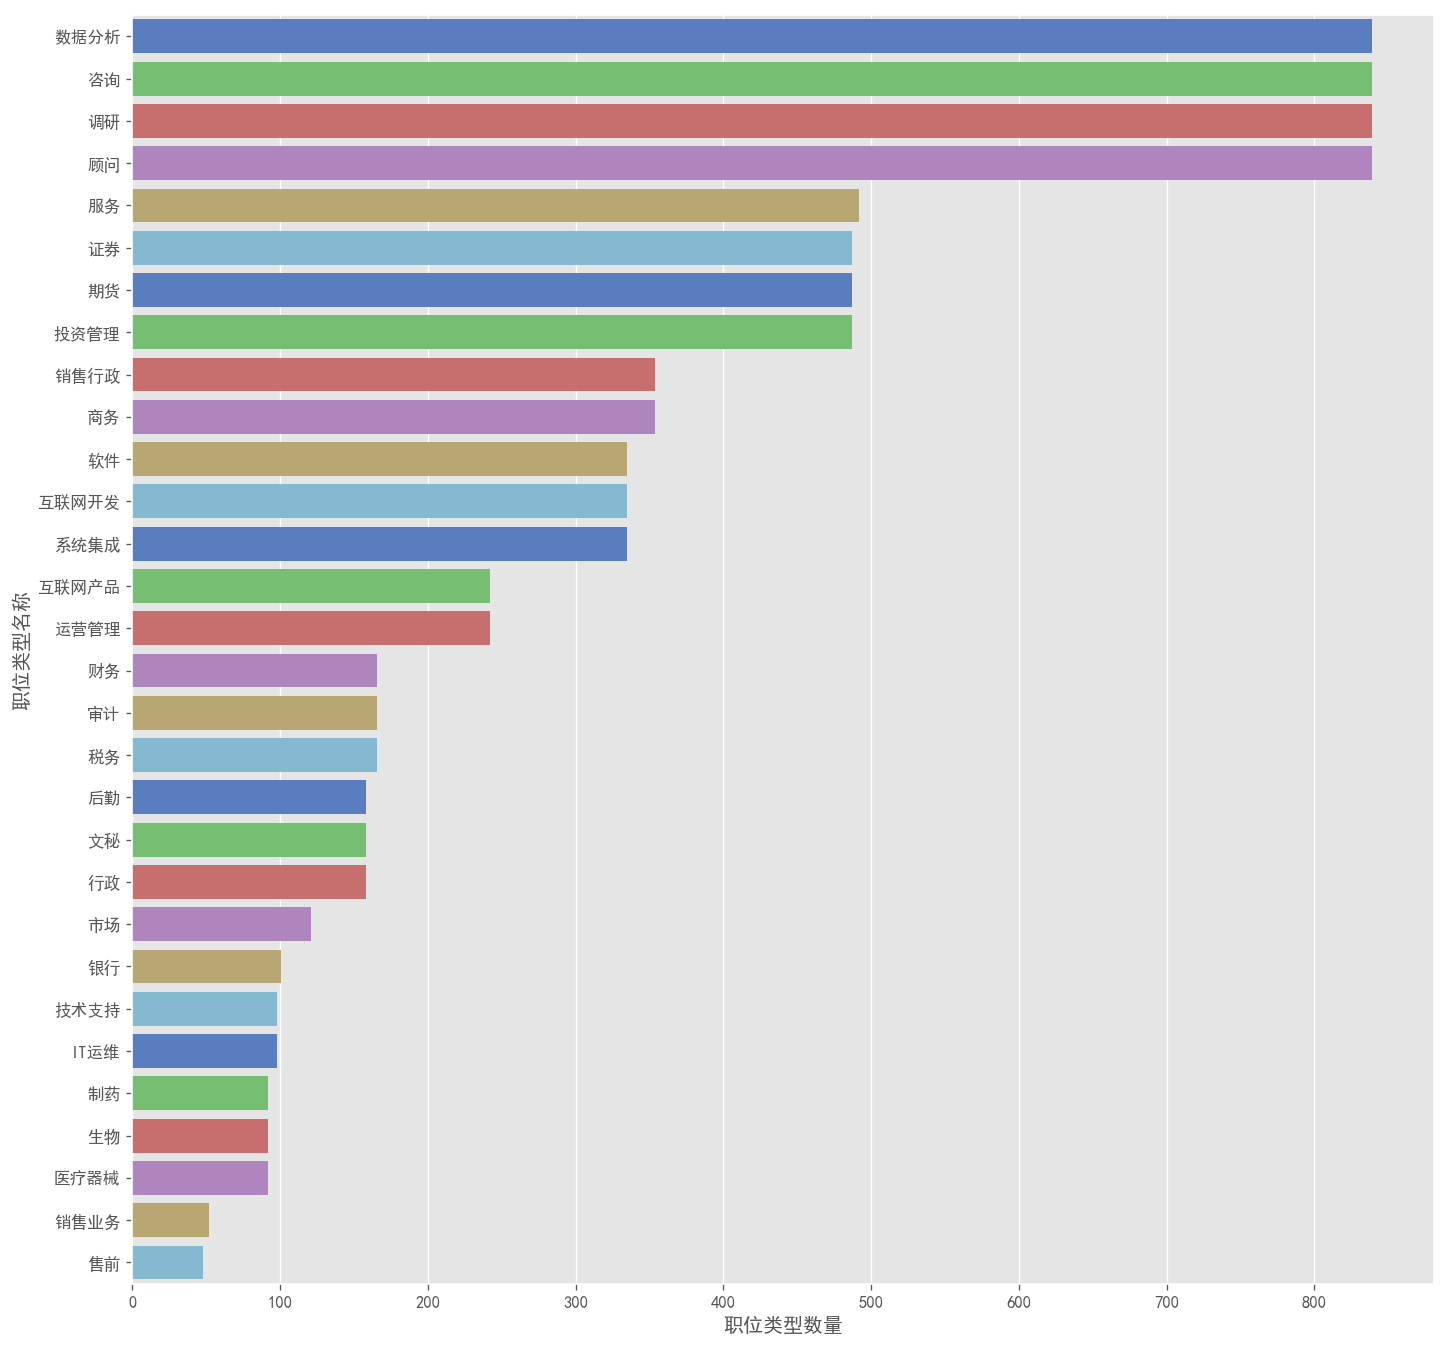

In [178]:
plt.figure(figsize=(14,14), dpi=120)
sns.barplot(y='职位类型名称', x='职位类型数量', data=da_type_df[:30], palette = 'muted', orient='h')
plt.savefig("2-2-1数据分析师职位类型统计(TOP30).jpg")

# 求职方

## 求职条件 - 工作经验

/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


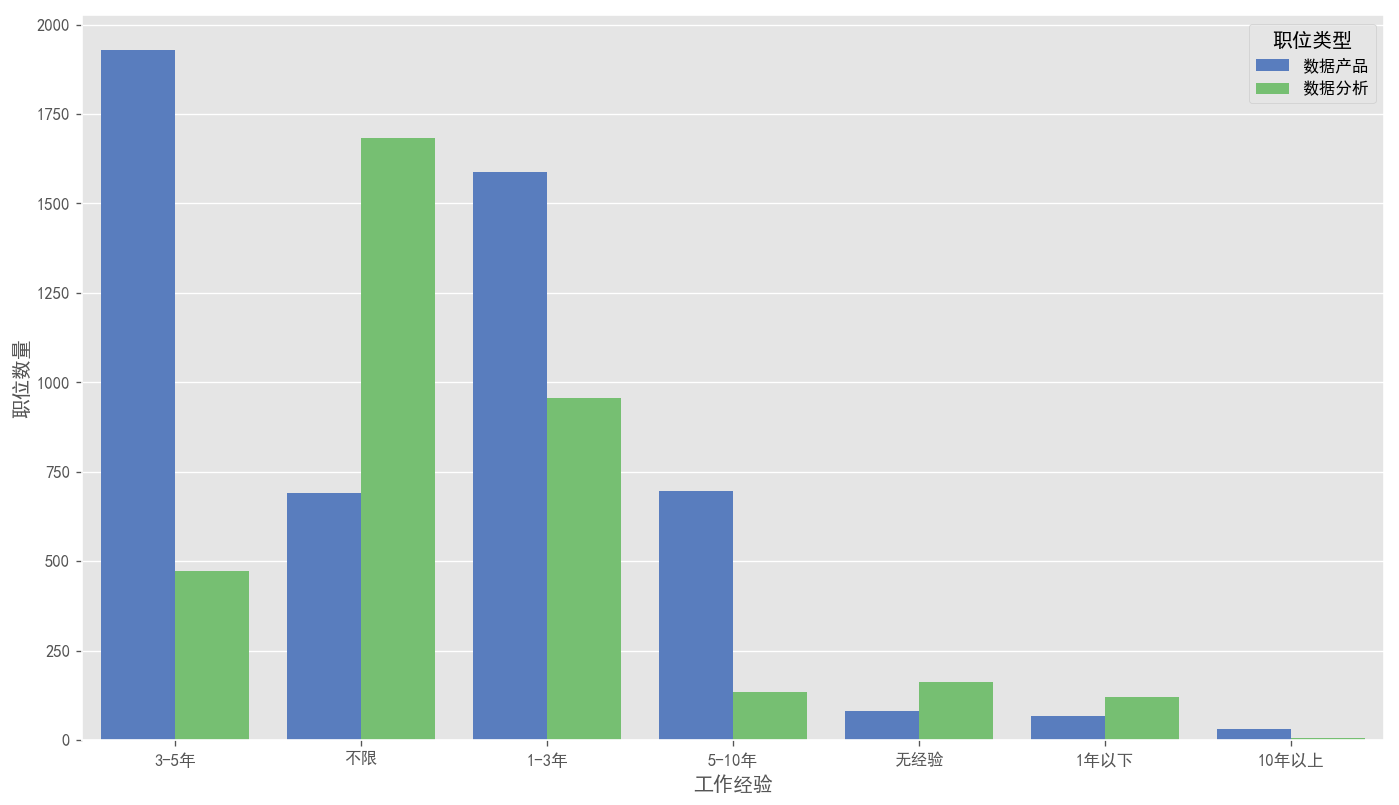

In [193]:
# 工作经验数据准备
df = pd.DataFrame(real_data_product_df.groupby('workingExp').size())
df.rename(columns={0:'数据产品'}, inplace=True)
df2 = pd.DataFrame(real_data_analysis_df.groupby('workingExp').size())
df2.rename(columns={0:'数据分析'}, inplace=True)
df = df.merge(df2, on='workingExp', how='outer')
df = df.fillna(0)
# 工作经验数据转化为可绘制hue图的类型
workexp_lis = list()
val_lis = list()
pos_lis = list()
tp = ['数据分析', '数据产品']
for i in range(len(df)):
    workexp = df.index[i]
    da = df.loc[workexp, tp[0]]
    dp = df.loc[workexp, tp[1]]
    workexp_lis += [workexp] * 2
    val_lis += [da, dp]
    pos_lis += tp
# 工作经验分布图
exp_bar_dic = {"职位类型": pos_lis, "职位数量": val_lis, "工作经验": workexp_lis}
exp_df = pd.DataFrame(exp_bar_dic, columns=['职位类型', '职位数量', '工作经验'])
exp_df = exp_df.sort_values('职位数量', ascending=False)
plt.figure(figsize=(14,8), dpi=120)
sns.barplot(x="工作经验", y="职位数量", hue='职位类型', data=exp_df, palette = 'muted')
plt.savefig("4-工作经验要求分布.jpg")
plt.show()

## 求职条件 - 学历

/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


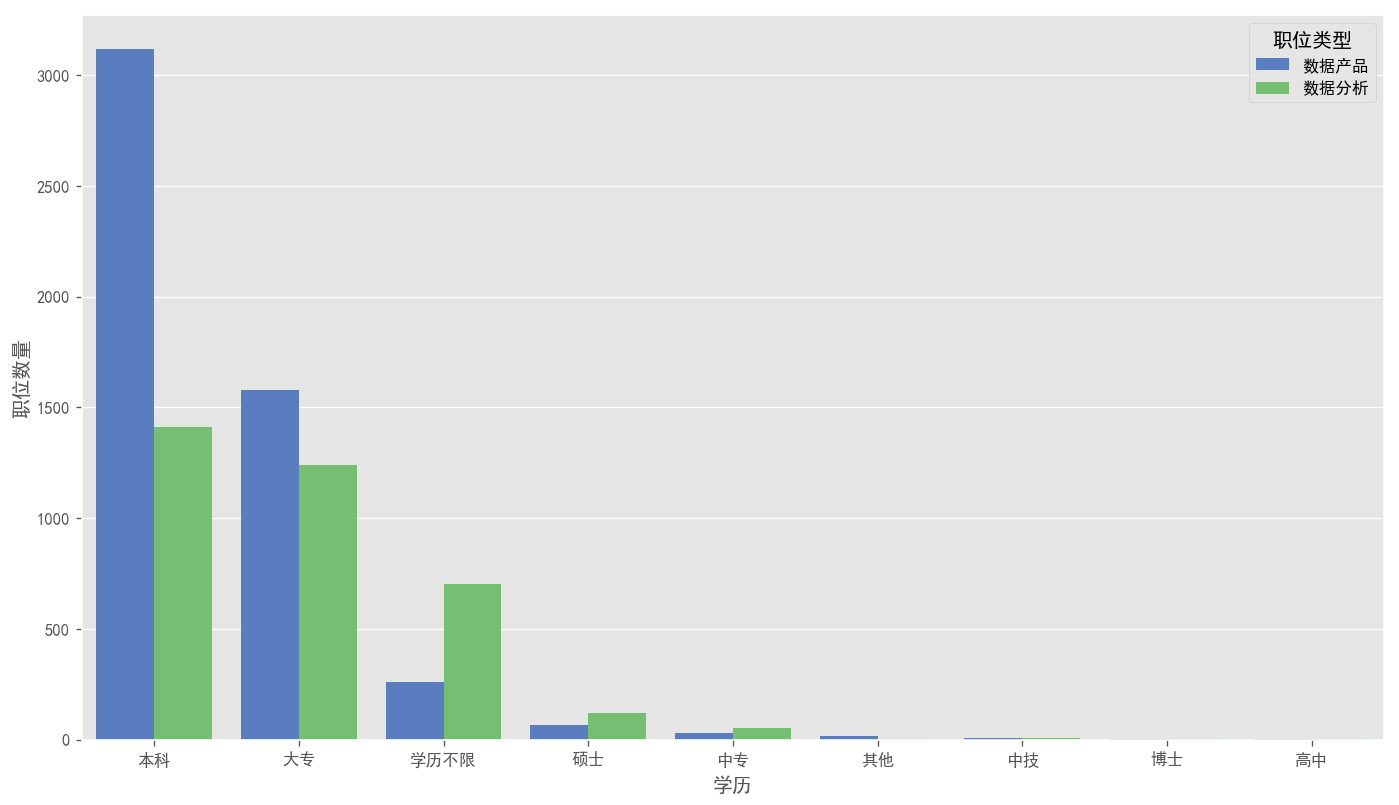

In [195]:
# 学历要求数据准备
df = pd.DataFrame(real_data_product_df.groupby('eduLevel').size())
df.rename(columns={0:'数据产品'}, inplace=True)
df2 = pd.DataFrame(real_data_analysis_df.groupby('eduLevel').size())
df2.rename(columns={0:'数据分析'}, inplace=True)
df = df.merge(df2, on='eduLevel', how='outer')
df = df.fillna(0)
# 学历要求数据转化为可绘制hue图的类型
edu_lis = list()
val_lis = list()
pos_lis = list()
tp = ['数据分析', '数据产品']
for i in range(len(df)):
    edu = df.index[i]
    da = df.loc[edu, tp[0]]
    dp = df.loc[edu, tp[1]]
    edu_lis += [edu] * 2
    val_lis += [da, dp]
    pos_lis += tp
# 学历要求分布图
edu_bar_dic = {"职位类型": pos_lis, "职位数量": val_lis, "学历": edu_lis}
edu_df = pd.DataFrame(edu_bar_dic, columns=['职位类型', '职位数量', '学历'])
edu_df = edu_df.sort_values('职位数量', ascending=False)
plt.figure(figsize=(14,8), dpi=120)
sns.barplot(x="学历", y="职位数量", hue='职位类型', data=edu_df, palette = 'muted')
plt.savefig("4-学历要求分布.jpg")
plt.show()

## 工作经验、学历与薪资的相关性分析

In [254]:
def convert_exp(df):
# 工作经验转化为平均工作经验用于相关性分析
    df['exp_median'] = ''
    for i in range(len(df)):
        exp_str = df.loc[i, 'workingExp']
        if exp_str == '不限' or exp_str == '无经验':
            df.loc[i, 'exp_median'] = 0
        else:
            exp_split = exp_str.split('-')
            if len(exp_split) > 1:
                high = float(exp_split[1][:-1])
                low = float(exp_split[0])
                df.loc[i, 'exp_median'] = (low + high) / 2
            else:
                df.loc[i, 'exp_median'] = float(exp_split[0].split('年')[0])
    return df

In [255]:
real_data_product_df = convert_exp(real_data_product_df)

In [256]:
real_data_analysis_df = convert_exp(real_data_analysis_df)

In [261]:
def conver_salary(df):
# 薪资转化为平均薪资用于相关性分析
    df['salary_median'] = ''
    for i in range(len(df)):
        if '-' in df.loc[i, 'salary']:
            sal_lis = df.loc[i, 'salary'].split('-')
            df.loc[i, 'salary_median'] = (float(sal_lis[0].split('K')[0]) + float(sal_lis[1].split('K')[0])) / 2
    return df

In [262]:
real_data_product_df = conver_salary(real_data_product_df)

In [263]:
real_data_analysis_df = conver_salary(real_data_analysis_df)